In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer  # Это нужно до импорта IterativeImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Column transformation
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_absolute_percentage_error, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, make_scorer

# Encoding (additional)
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer  # Это нужно до импорта IterativeImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Column transformation
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_absolute_percentage_error, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, make_scorer

# Encoding (additional)
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, PowerTransformer, QuantileTransformer, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from collections import OrderedDict

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingRegressor
cancer = load_breast_cancer()
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report, RocCurveDisplay, DetCurveDisplay,PrecisionRecallDisplay
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn.model_selection import KFold, cross_val_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

# Путь к тренировочному набору
path_train = 'train.csv'
path_test = 'test.csv'
df = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)
print(df.shape, X_test.shape)

(400, 11) (134, 10)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        400 non-null    float64
 1   education   400 non-null    int64  
 2   experience  400 non-null    int64  
 3   age         400 non-null    int64  
 4   ethnicity   400 non-null    object 
 5   region      400 non-null    object 
 6   gender      400 non-null    object 
 7   occupation  400 non-null    object 
 8   sector      400 non-null    object 
 9   union       400 non-null    object 
 10  married     400 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 34.5+ KB


In [6]:
X = df.drop(['wage'], axis = 1)
y = df.wage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [7]:
cat_features = ['ethnicity', 'region', 'gender', 'occupation', 'sector', 'union', 'married'] 
num_features = ['experience', 'age', 'education']

X = df.drop(columns = ['wage'], axis=1)
y = df['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

num_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),  # Полиномиальные признаки
    ('scaler', StandardScaler())  # Стандартизация
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

CT = ColumnTransformer([
    ('num', num_pipeline, num_features),  # Числовые данные
    ('cat', cat_pipeline, cat_features)   # Категориальные данные
])

In [19]:
CT.set_output(transform ='pandas')
look_df = CT.fit_transform(X_train)
pd.DataFrame(look_df).head()

,num__experience,num__age,num__education,num__experience^2,num__experience age,num__experience education,num__age^2,num__age education,num__education^2,cat__ethnicity_cauc,...,cat__occupation_services,cat__occupation_technical,cat__occupation_worker,cat__sector_construction,cat__sector_manufacturing,cat__sector_other,cat__union_no,cat__union_yes,cat__married_no,cat__married_yes
157,0.091671,0.185579,0.391097,-0.191612,-0.074951,0.323263,0.030803,0.431672,0.311289,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
109,-0.801835,-0.936528,-0.374688,-0.709198,-0.775280,-0.867889,-0.871179,-0.952045,-0.469346,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
17,-0.964290,-0.763896,1.156883,-0.757994,-0.827837,-0.867889,-0.755896,-0.147833,1.212021,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
347,-1.370429,-1.454423,0.008205,-0.818989,-1.022300,-1.449451,-1.165791,-1.259537,-0.094041,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
24,0.497810,0.444527,-0.374688,0.183072,0.275871,0.477412,0.290190,0.183313,-0.469346,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# **Модельки**

In [9]:
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', Lasso())
])

param_grid = {
    # Степень полиномиальных признаков
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # Параметр регуляризации alpha для Lasso
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],

    # Нужно ли учитывать свободный член (fit_intercept)
    'regressor__fit_intercept': [True, False],

    # Максимальное количество итераций (для solver='saga' и 'lbfgs')
    'regressor__max_iter': [500, 1000, 5000],

    # Точность решения
    'regressor__tol': [1e-4, 1e-3, 1e-2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.560e+00, tolerance: 2.157e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.433e+00, tolerance: 2.012e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 500, 'regressor__tol': 0.0001}
Лучший результат на валидации (MSE): 23.67109912728904
Результат на тестовых данных (MSE): 13.624780456401052


In [10]:
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', SVR())
])
param_grid = {
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5],  # Степень полиномиальных признаков
    # 'preprocessor__num__binner__n_bins': [3, 5, 10, 12, 15, 18, 20],  # Количество бинов для бининг
    'regressor__C': [0.1, 1, 10, 100, 1000],  # Регуляризация
    'regressor__kernel': ['linear', 'poly', 'rbf'],  # Тип ядра
    'regressor__epsilon': [0.01, 0.1, 0.2],  # Параметр для регрессии
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 10 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 225 candidates, totalling 675 fits
Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__C': 10, 'regressor__epsilon': 0.01, 'regressor__kernel': 'linear'}
Лучший результат на валидации (MSE): 23.816542213177765
Результат на тестовых данных (MSE): 13.323767867680944


In [11]:
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', Ridge())
])
param_grid = {
    # Полиномиальные признаки (степени от 1 до 10 для полных переборов)
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Степень полиномиальных признаков

    # Регуляризация (параметр alpha в Ridge)
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],  # Разнообразие значений alpha

    # Метод решения задачи для Ridge
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga', 'lbfgs'],  # Дополнительно добавлен 'lbfgs'

    # Нужно ли учитывать свободный член
    'regressor__fit_intercept': [True, False],  # Разные варианты с учетом и без учета

    # Дополнительные параметры для регуляризации и решения задачи
    'regressor__max_iter': [500, 1000, 5000],  # Максимальное количество итераций (для solver='saga' и 'lbfgs')
    'regressor__tol': [1e-4, 1e-3, 1e-2],  # Точность решения
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not conver

Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__alpha': 10, 'regressor__fit_intercept': True, 'regressor__max_iter': 500, 'regressor__solver': 'lsqr', 'regressor__tol': 0.0001}
Лучший результат на валидации (MSE): 23.61831270496407
Результат на тестовых данных (MSE): 12.79044864837695


In [12]:
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', Lasso())
])
param_grid = {
    # Степень полиномиальных признаков
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # Параметр регуляризации alpha для Lasso
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],

    # Нужно ли учитывать свободный член (fit_intercept)
    'regressor__fit_intercept': [True, False],

    # Максимальное количество итераций (для solver='saga' и 'lbfgs')
    'regressor__max_iter': [500, 1000, 5000],

    # Точность решения
    'regressor__tol': [1e-4, 1e-3, 1e-2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.560e+00, tolerance: 2.157e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.433e+00, tolerance: 2.012e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__max_iter': 500, 'regressor__tol': 0.0001}
Лучший результат на валидации (MSE): 23.67109912728904
Результат на тестовых данных (MSE): 13.624780456401052


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+02, tolerance: 2.330e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.637e+02, tolerance: 2.157e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [13]:
# Модель ElasticNet с пайплайном
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', ElasticNet())
])

# Расширенная сетка параметров для ElasticNet
param_grid = {
    # Степень полиномиальных признаков
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # Параметр регуляризации alpha для ElasticNet
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100, 500, 1000],

    # Соотношение L1 и L2 регуляризации
    'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0],  # 1.0 - Lasso, 0 - Ridge

    # Нужно ли учитывать свободный член (fit_intercept)
    'regressor__fit_intercept': [True, False],

    # Максимальное количество итераций
    'regressor__max_iter': [500, 1000, 5000],

    # Точность решения
    'regressor__tol': [1e-4, 1e-3, 1e-2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 7200 candidates, totalling 21600 fits


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+02, tolerance: 2.157e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.528e+01, tolerance: 2.012e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__alpha': 0.1, 'regressor__fit_intercept': True, 'regressor__l1_ratio': 0.5, 'regressor__max_iter': 500, 'regressor__tol': 0.01}
Лучший результат на валидации (MSE): 23.60530613976611
Результат на тестовых данных (MSE): 13.374850292067844


/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.729e+02, tolerance: 2.330e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.210e+02, tolerance: 2.157e+00
  model = cd_fast.enet_coordinate_descent(
/Volumes/MacMedia_MY/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

In [14]:
# Модель KNeighborsRegressor с пайплайном
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', KNeighborsRegressor())
])

# Расширенная сетка параметров для KNN
param_grid = {
    # Степень полиномиальных признаков
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # Количество соседей для KNN
    'regressor__n_neighbors': [3, 5, 7, 10, 15, 20, 30],

    # Веса для соседей (uniform или distance)
    'regressor__weights': ['uniform', 'distance'],

    # Алгоритм поиска соседей
    'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],

    # Размер листа для деревьев поиска
    'regressor__leaf_size': [10, 20, 30, 40, 50],

    # Параметр p для метрики расстояния (p=2 — Евклидово расстояние, p=1 — Манхэттенское расстояние)
    'regressor__p': [1, 2]
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 5600 candidates, totalling 16800 fits
Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__algorithm': 'kd_tree', 'regressor__leaf_size': 30, 'regressor__n_neighbors': 30, 'regressor__p': 2, 'regressor__weights': 'uniform'}
Лучший результат на валидации (MSE): 25.117098545090965
Результат на тестовых данных (MSE): 14.117075432407406


In [15]:
# Модель LinearRegression с пайплайном
model = Pipeline(steps=[
    ('preprocessor', CT),
    ('regressor', LinearRegression())
])

# Расширенная сетка параметров для LinearRegression
param_grid = {
    # Полиномиальные признаки
    'preprocessor__num__poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

    # Параметры для LinearRegression
    'regressor__fit_intercept': [True, False],  # Нужно ли учитывать свободный член
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__fit_intercept': True}
Лучший результат на валидации (MSE): 23.803748713013757
Результат на тестовых данных (MSE): 12.904535926010071


In [16]:
# Модель GradientBoostingRegressor с пайплайном
model = Pipeline(steps=[
    ('preprocessor', CT),  # Преобразование данных
    ('regressor', GradientBoostingRegressor())  # Регрессор
])

# Расширенная сетка параметров для GradientBoostingRegressor
param_grid = {
    # Полиномиальные признаки
    'preprocessor__num__poly__degree': [1, 2, 3],

    # Параметры для GradientBoostingRegressor
    'regressor__n_estimators': [300, 400],  # Количество деревьев в модели
    'regressor__learning_rate': [0.001, 0.01, 0.1, 0.2],  # Темп обучения
    'regressor__max_depth': [3, 4, 5],  # Максимальная глубина дерева
    'regressor__min_samples_split': [2, 5, 10],  # Минимальное количество примеров для разделения узла
    'regressor__subsample': [0.8, 1.0],  # Доля выборки для каждого дерева
    'regressor__loss': ['ls', 'lad', 'huber']  # Функция потерь
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,  # Кросс-валидация на 3 фолдах
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка модели на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Лучшие параметры: {'preprocessor__num__poly__degree': 1, 'regressor__learning_rate': 0.01, 'regressor__loss': 'huber', 'regressor__max_depth': 3, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300, 'regressor__subsample': 0.8}
Лучший результат на валидации (MSE): 25.712240036928137
Результат на тестовых данных (MSE): 13.381310021030094


In [17]:
model = Pipeline(steps=[
    ('preprocessing', CT),  # Применение предобработки
    ('regressor', RandomForestRegressor(n_jobs=-1, oob_score=True, bootstrap=True))  # Основная модель
])
param_grid = {
    'preprocessing__num__poly__degree': [1, 2, 3, 4, 5],  # Перебор степени полиномиальных признаков
}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,  # Кросс-валидация на 2 фолда
    n_jobs=-1,  # Использовать все ядра
    verbose=1,
    scoring='neg_mean_squared_error'
)

# Обучение GridSearchCV
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценка модели
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший результат на валидации (MSE):", -grid_search.best_score_)

# Оценка на тестовых данных
test_score = grid_search.score(X_test, y_test)
print("Результат на тестовых данных (MSE):", -test_score)



Fitting 10 folds for each of 5 candidates, totalling 50 fits
Лучшие параметры: {'preprocessing__num__poly__degree': 1}
Лучший результат на валидации (MSE): 30.48547986290985
Результат на тестовых данных (MSE): 17.407451202206023


# **Попробую все склеить**

# **Войтинг** Беру SVR, Ridge, LinearRegress**

MSE for Lasso: 12.2774
MSE for SVR: 12.4135
MSE for Ridge: 12.2684
MSE for VotingRegressor: 12.0491


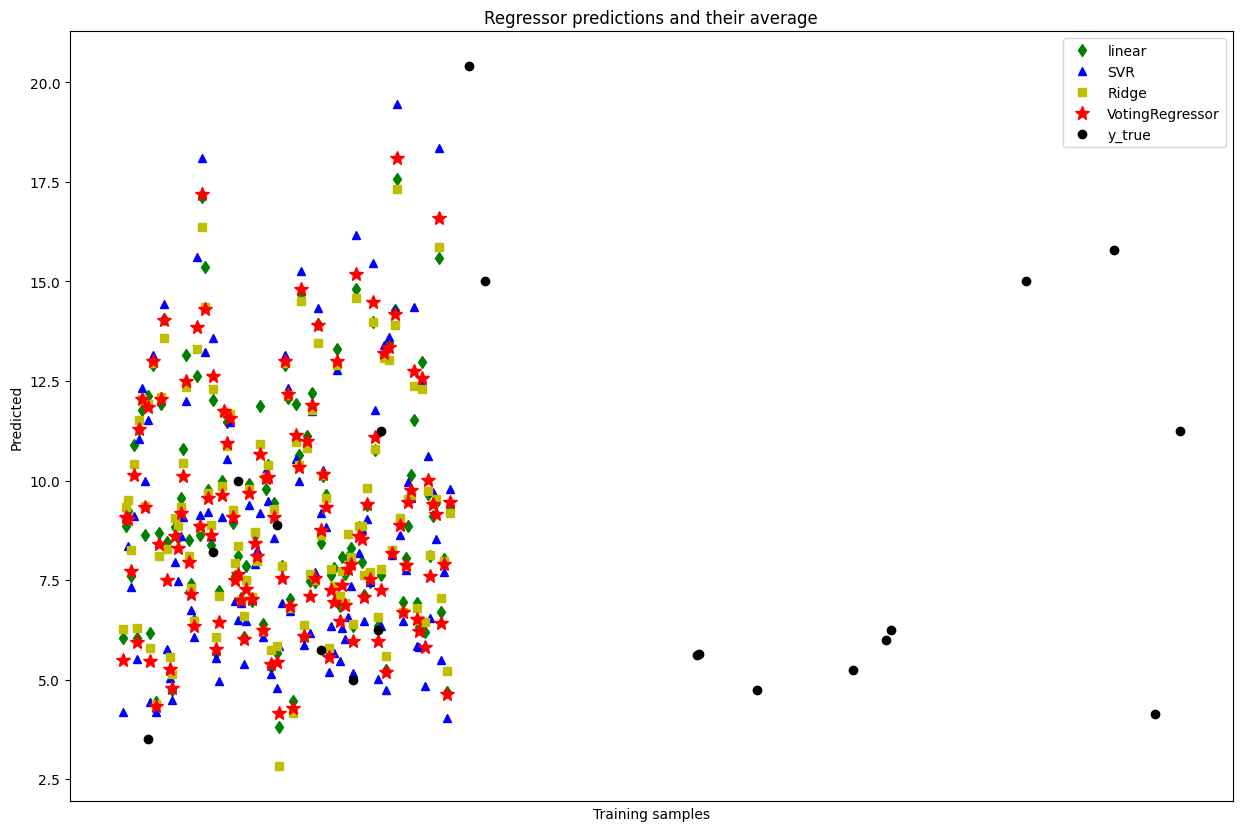

In [22]:
# Пайплайн для SVR с подобранными параметрами
svr = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', SVR(kernel='linear', C=10, epsilon=0.01))
])

linear = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', LinearRegression(fit_intercept=True))
])


# Пайплайн для Ridge с подобранными параметрами
ridge = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', Ridge(alpha=10, fit_intercept=True, max_iter=500, solver='lsqr', tol=0.0001))
])


# Обучение моделей
linear.fit(X_train, y_train)
svr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Объединение моделей в VotingRegressor
voting_reg = VotingRegressor([("linear", linear), ("svr", svr), ("ridge", ridge)])

# Обучение VotingRegressor
voting_reg.fit(X_train, y_train)

# Прогнозы на тестовых данных
linear_pred = linear.predict(X_test)
svr_pred = svr.predict(X_test)
ridge_pred = ridge.predict(X_test)
voting_pred = voting_reg.predict(X_test)

# Вычисление MSE для каждой модели
linear_mse = mean_squared_error(y_test, linear_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
voting_mse = mean_squared_error(y_test, voting_pred)

# Вывод MSE для каждой модели
print(f"MSE for Lasso: {linear_mse:.4f}")
print(f"MSE for SVR: {svr_mse:.4f}")
print(f"MSE for Ridge: {ridge_mse:.4f}")
print(f"MSE for VotingRegressor: {voting_mse:.4f}")

# Визуализация
plt.figure(figsize=(15, 10))
plt.plot(linear_pred, "gd", label="linear")
plt.plot(svr_pred, "b^", label="SVR")
plt.plot(ridge_pred, "ys", label="Ridge")
plt.plot(voting_pred, "r*", ms=10, label="VotingRegressor")
plt.plot(y_test[:20], "ko", label="y_true")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()

# **Вместо линейной беру LAsso 

MSE for Lasso: 22.5973
MSE for SVR: 12.4135
MSE for Ridge: 12.2684
MSE for VotingRegressor: 13.5249


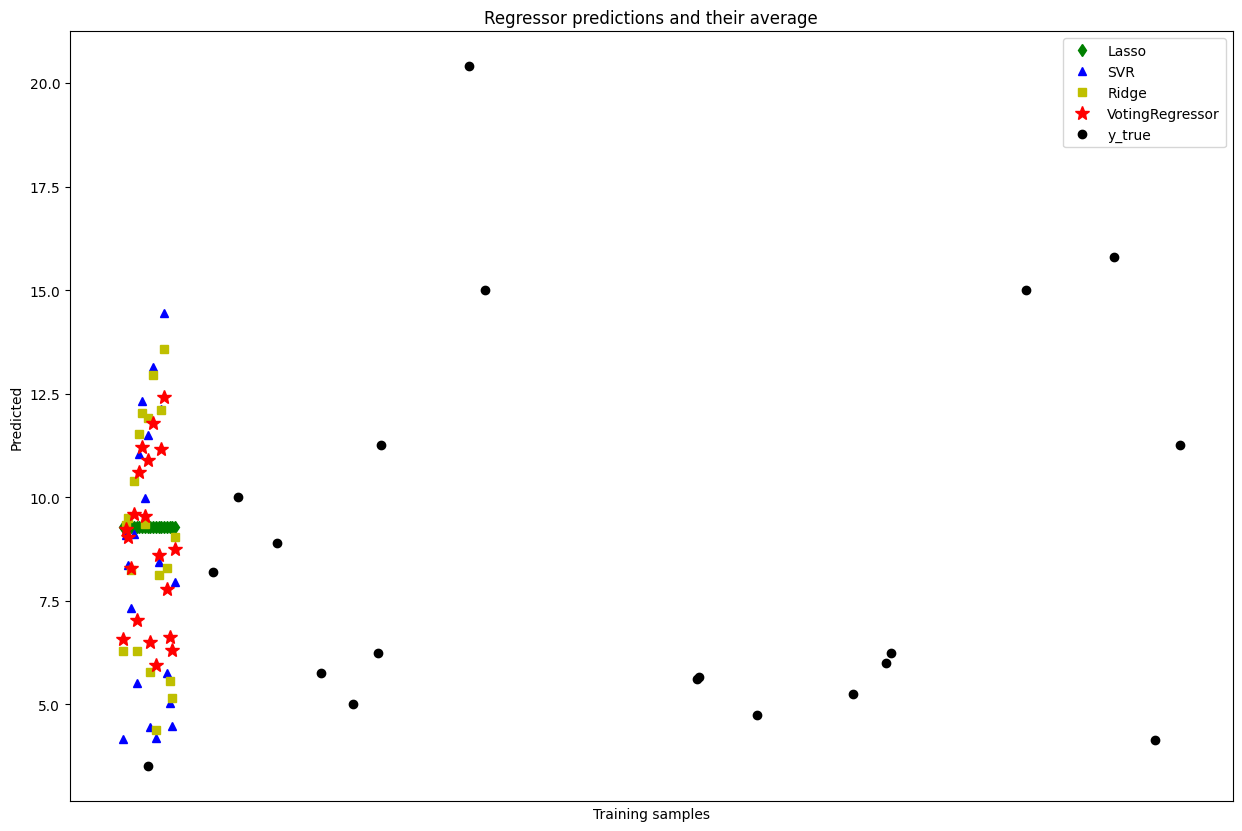

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




cat_features = ['ethnicity', 'region', 'gender', 'occupation', 'sector', 'union', 'married'] 
num_features = ['experience', 'age', 'education']

X = df.drop(columns = ['wage'], axis=1)
y = df['wage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

num_pipeline = Pipeline(steps=[
    ('poly', PolynomialFeatures(include_bias=False)),  # Полиномиальные признаки
    ('scaler', StandardScaler())  # Стандартизация
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

CT = ColumnTransformer([
    ('num', num_pipeline, num_features),  # Числовые данные
    ('cat', cat_pipeline, cat_features)   # Категориальные данные
])


# Пайплайн для Lasso с подобранными параметрами
lasso = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', Lasso(alpha=10, fit_intercept=True, max_iter=500, tol=0.0001))
])

# Пайплайн для SVR с подобранными параметрами
svr = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', SVR(kernel='linear', C=10, epsilon=0.01))
])

# Пайплайн для Ridge с подобранными параметрами
ridge = Pipeline(steps=[
    ('preprocessor', CT),  # CT — ваш ColumnTransformer для предобработки
    ('regressor', Ridge(alpha=10, fit_intercept=True, max_iter=500, solver='lsqr', tol=0.0001))
])

# Обучение моделей
lasso.fit(X_train, y_train)
svr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Объединение моделей в VotingRegressor
voting_reg = VotingRegressor([("lasso", lasso), ("svr", svr), ("ridge", ridge)])

# Обучение VotingRegressor
voting_reg.fit(X_train, y_train)

# Прогнозы на тестовых данных
lasso_pred = lasso.predict(X_test)
svr_pred = svr.predict(X_test)
ridge_pred = ridge.predict(X_test)
voting_pred = voting_reg.predict(X_test)

# Вычисление MSE для каждой модели
lasso_mse = mean_squared_error(y_test, lasso_pred)
svr_mse = mean_squared_error(y_test, svr_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
voting_mse = mean_squared_error(y_test, voting_pred)

# Вывод MSE для каждой модели
print(f"MSE for Lasso: {lasso_mse:.4f}")
print(f"MSE for SVR: {svr_mse:.4f}")
print(f"MSE for Ridge: {ridge_mse:.4f}")
print(f"MSE for VotingRegressor: {voting_mse:.4f}")

# Визуализация
plt.figure(figsize=(15, 10))
plt.plot(lasso_pred[:20], "gd", label="Lasso")
plt.plot(svr_pred[:20], "b^", label="SVR")
plt.plot(ridge_pred[:20], "ys", label="Ridge")
plt.plot(voting_pred[:20], "r*", ms=10, label="VotingRegressor")
plt.plot(y_test[:20], "ko", label="y_true")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Predicted")
plt.xlabel("Training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()
